In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [46]:
df = pd.read_csv('../Data/Masterchef.csv')

In [47]:
df_text = df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,728166702677900,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...
1,727642092730361,The Thanksgiving dishes are cooking now... 🦃\n...
2,727607916067112,Who knew mashed potatoes were so complicated?!...
3,723706983123872,Amazing skills indeed! 🐟👏\n\n📺: MasterChef on ...
4,722593639901873,Feel like your knife skills can't cut it? 🔪\n\...
...,...,...
295,5652856994727337,A knight in shining armor coming to the (bakin...
296,5652345568111813,Are you ready for an all-new MasterChef? We ar...
297,5650204744992562,We are going to miss Shayne in the Masterchef ...
298,5649824995030537,We're down to our Top 15 and this week it's ti...


###  LỌC RA CÁC BÀI VIẾT CÓ GIÁ TRỊ KHÁC NONE TRONG PHẦN POSTTEXT

In [48]:
df = df[df['post_text'].notna()]
df.reset_index(drop=True, inplace=True)

In [49]:
df.shape[0]

288

### ĐỘ DÀI TRUNG BÌNH CỦA BÀI ĐĂNG

In [50]:
df['post_length'] = df['post_text'].apply(lambda x: len(str(x)))

# Tính độ dài trung bình của các bài đăng
average_length = round(df['post_length'].mean(),2)
print("Độ dài trung bình của bài đăng:", average_length)

Độ dài trung bình của bài đăng: 110.83


### TỪ BÌNH THƯỜNG XUẤT HIỆN NHIỀU NHẤT TRONG CÁC BÀI ĐĂNG

In [51]:
from collections import Counter
combined_text = " ".join(df['post_text'].dropna())

# Tách các từ trong chuỗi thành danh sách các từ
words = combined_text.split()
word_counts = Counter(words)

# Xác định từ xuất hiện nhiều nhất
most_common_word, most_common_count = word_counts.most_common(1)[0]
print(f"Từ xuất hiện nhiều nhất: '{most_common_word}' với {most_common_count} lần")

Từ xuất hiện nhiều nhất: 'the' với 169 lần


### Biều đồ keywords

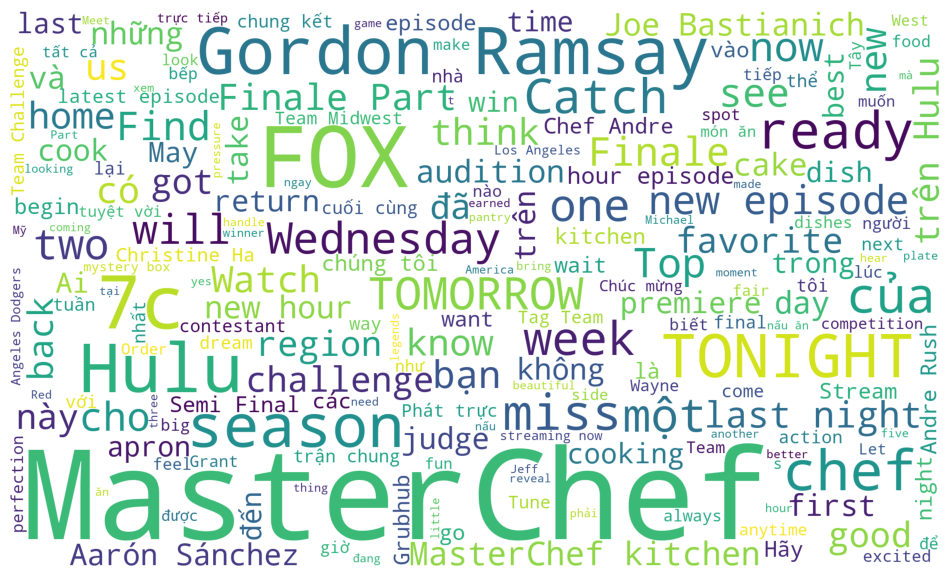

In [52]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', width=2000, height=1200).generate(combined_text)
plt.figure(figsize=(12,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### BIỂU ĐỒ LOẠI BỎ STOPWORDS TIẾNG VIỆT

In [53]:
combined_text = " ".join(df['post_text'].dropna())

In [54]:
len(combined_text)

32205

In [55]:
combined_text

'Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to all our #MasterChef fam!\n\nĐã kích hoạt chế độ chim. 🔪 🦃\n\nChúc mừng lễ Tạ ơn tất cả gia đình #MasterChef của chúng ta! The Thanksgiving dishes are cooking now... 🦃\n\nWhat dish are you hoping our hosts will bring to the table? I know I can\'t wait to take a bite of Gordon Ramsay\'s Beef Wellington. 🤤🥩\n\nCác món ăn lễ tạ ơn đang nấu... 🦃\n\nCác bạn mong chủ nhà mình mang món gì lên bàn ăn? Tôi biết tôi không thể chờ đợi để ăn một miếng Beef Wellington của Gordon Ramsay 🤤🥩 Who knew mashed potatoes were so complicated?! 😭\n\n📺: MasterChef on Hulu\n\nAi mà biết khoai tây nghiền lại phức tạp đến vậy?! 😭\n\n📺: MasterChef trên Hulu Amazing skills indeed! 🐟👏\n\n📺: MasterChef on Hulu Feel like your knife skills can\'t cut it? 🔪\n\nLearn how to chop like a #MasterChef champion in the first installment of the new "Like A MasterChef Champion" guide series!\n\nhttps://us.masterchef.com/blogs/masterchef-pantry/chop-like-a-master-chef Stir things up

In [56]:
import requests
url = 'https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt'
response = requests.get(url)
vietnamese_stopwords = set(response.text.splitlines())

# Thêm vào stopword mặc định nếu cần
vietnamese_stopwords.update(STOPWORDS)
for word in vietnamese_stopwords:
    combined_text = combined_text.replace(' ' + word + ' ', ' ')

In [57]:
len(combined_text)

24510

In [58]:
import requests
url = 'https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt'
response = requests.get(url)
vietnamese_stopwords = set(response.text.splitlines())

# Thêm vào stopword mặc định nếu cần
vietnamese_stopwords.update(STOPWORDS)
for word in vietnamese_stopwords:
    combined_text = combined_text.replace(' ' + word + ' ', ' ')

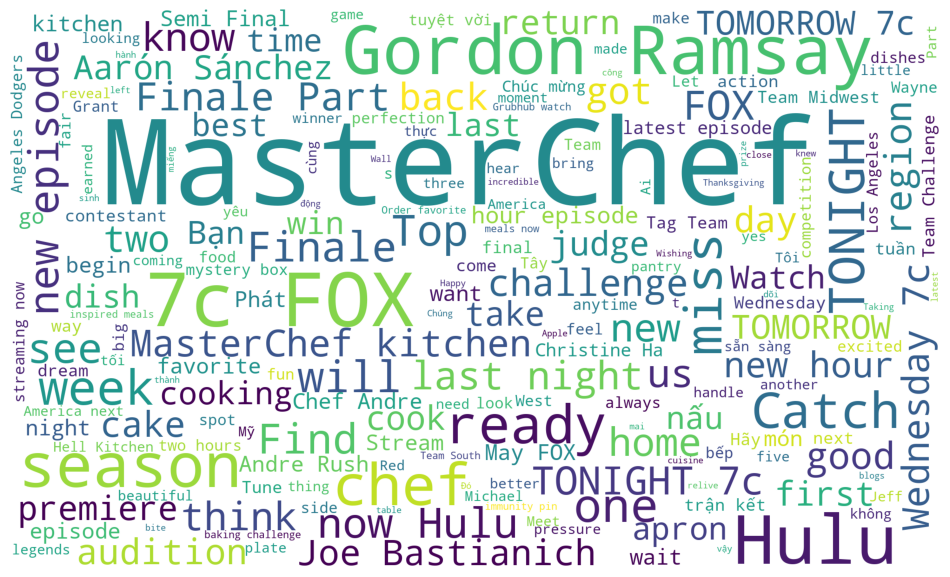

In [59]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', width=2000, height=1200).generate(combined_text)
plt.figure(figsize=(12,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import tokenize
import math
from operator import itemgetter

In [61]:
total_words = combined_text.split()
total_word_length = len(total_words)
print(total_word_length)

#tìm số câu xuất hiện trong tài liệu
total_sentences = tokenize.sent_tokenize(combined_text)
total_sent_len = len(total_sentences)
print(total_sent_len) 

3895
534


In [62]:
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word in tf_score:
        tf_score[each_word] += 1
    else:
        tf_score[each_word] = 1
print(tf_score)

tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Bird': 1, 'mode': 1, 'engaged': 1, '🔪🦃': 1, 'Happy': 6, 'Thanksgiving': 3, '#MasterChef': 92, 'fam!': 1, 'Đã': 1, 'kích': 1, 'hoạt': 1, 'chế': 2, 'độ': 2, 'chim': 1, '🔪': 2, '🦃': 3, 'Chúc': 4, 'mừng': 4, 'lễ': 2, 'Tạ': 1, 'ơn': 2, 'gia': 2, 'đình': 2, 'ta!': 1, 'The': 22, 'dishes': 3, 'cooking': 6, 'now': 18, 'What': 8, 'dish': 5, 'hoping': 2, 'hosts': 1, 'will': 15, 'bring': 2, 'table?': 1, 'I': 12, 'know': 9, 'wait': 5, 'take': 4, 'bite': 3, 'Gordon': 38, "Ramsay's": 4, 'Beef': 2, 'Wellington': 2, '🤤🥩': 2, 'Các': 2, 'món': 7, 'tạ': 1, 'nấu': 7, 'mong': 2, 'chủ': 1, 'bàn': 1, 'ăn?': 1, 'Tôi': 2, 'chờ': 1, 'đợi': 1, 'miếng': 3, 'Ramsay': 28, 'Who': 13, 'knew': 3, 'mashed': 1, 'potatoes': 1, 'complicated?!': 1, '😭': 4, '📺:': 18, 'MasterChef': 64, 'Hulu': 17, 'Ai': 4, 'khoai': 1, 'tây': 1, 'nghiền': 1, 'phức': 1, 'tạp': 4, 'vậy?!': 1, 'Amazing': 1, 'skills': 2, 'indeed!': 1, '🐟👏': 1, 'Feel': 1, 'knife': 1, 'cut': 1, 'it?': 2, 'Learn': 2, 'chop': 1, 'champion': 1, 'first': 9, 'installme

In [63]:
tf_score

{'Bird': 0.00025673940949935817,
 'mode': 0.00025673940949935817,
 'engaged': 0.00025673940949935817,
 '🔪🦃': 0.00025673940949935817,
 'Happy': 0.0015404364569961489,
 'Thanksgiving': 0.0007702182284980744,
 '#MasterChef': 0.02362002567394095,
 'fam!': 0.00025673940949935817,
 'Đã': 0.00025673940949935817,
 'kích': 0.00025673940949935817,
 'hoạt': 0.00025673940949935817,
 'chế': 0.0005134788189987163,
 'độ': 0.0005134788189987163,
 'chim': 0.00025673940949935817,
 '🔪': 0.0005134788189987163,
 '🦃': 0.0007702182284980744,
 'Chúc': 0.0010269576379974327,
 'mừng': 0.0010269576379974327,
 'lễ': 0.0005134788189987163,
 'Tạ': 0.00025673940949935817,
 'ơn': 0.0005134788189987163,
 'gia': 0.0005134788189987163,
 'đình': 0.0005134788189987163,
 'ta!': 0.00025673940949935817,
 'The': 0.005648267008985879,
 'dishes': 0.0007702182284980744,
 'cooking': 0.0015404364569961489,
 'now': 0.004621309370988447,
 'What': 0.0020539152759948653,
 'dish': 0.0012836970474967907,
 'hoping': 0.0005134788189987163

In [64]:
# Tra cứu tần suất của từ "Ramsay" trong cả hai dạng chữ hoa và chữ thường
frequency_upper = tf_score.get("Ramsay", 0)
frequency_lower = tf_score.get("ramsay", 0)

total_frequency = frequency_upper + frequency_lower

print(f"Total Frequency of 'Ramsay' (both cases):", total_frequency)


Total Frequency of 'Ramsay' (both cases): 0.007188703465982028


In [65]:
# Sắp xếp từ điển tf_score theo giá trị (tần suất) từ cao xuống thấp
sorted_tf_score = sorted(tf_score.items(), key=lambda x: x[1], reverse=True)

top_10_words = dict(sorted_tf_score[:10])
print(top_10_words)


{'#MasterChef': 0.02362002567394095, 'MasterChef': 0.016431322207958923, '8/7c': 0.01258023106546855, 'FOX': 0.011296534017971758, 'Gordon': 0.00975609756097561, 'Ramsay': 0.007188703465982028, 'The': 0.005648267008985879, 'Hulu!': 0.005648267008985879, "Don't": 0.005391527599486521, 'last': 0.005134788189987163}


### Biều đồ TF-IDF

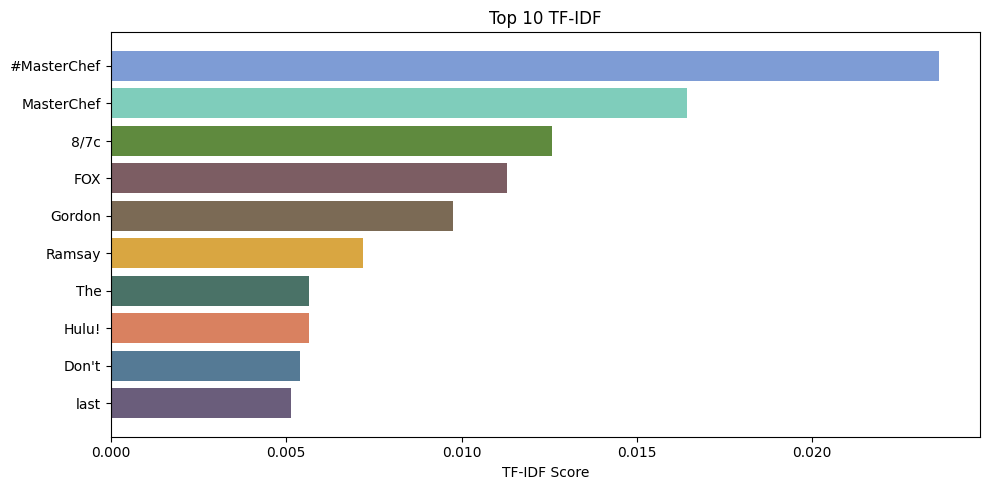

In [66]:
updated_terms = [
    "#MasterChef", "MasterChef", "8/7c", "FOX", "Gordon",
    "Ramsay", "The", "Hulu!", "Don't", "last"
]
updated_tf_idf_scores = [
    0.023601847101077475, 0.016418676244227808, 0.012570548999486916,
    0.011287839917906618, 0.009748589020010261, 0.007183170856849667,
    0.005643919958953309, 0.005643919958953309, 0.00538737814263725,
    0.00513083632632119
]

muted_colors = [
    '#6A5D7B', '#557A95', '#D98160', '#4A7267', '#D9A641',
    '#7B6A55', '#7C5D63', '#5F8A3E', '#7FCDBB', '#7e9cd5'
]

plt.figure(figsize=(10, 5))
for i in range(len(updated_terms)):
    plt.barh(updated_terms[::-1][i], updated_tf_idf_scores[::-1][i], color=muted_colors[i])
plt.xlabel('TF-IDF Score')
plt.title('Top 10 TF-IDF')
plt.tight_layout()
plt.show()